Importamos los módulos necesarios

# Antigua Version

In [1]:
import numpy as np # Calculo numérico
import sympy as sp # Cálculo simbólico
import matplotlib.pyplot as plt # Graficar
from matplotlib.colors import ListedColormap
from matplotlib import lines
# Inicializamos semilla
np.random.seed(1)


# Funciones auxiliares

In [2]:
##############################################################################
############################### EJERCICIO 1.1 ################################
##############################################################################

def simula_unif(N, dim, rango):
    return np.random.uniform(rango[0],rango[1],(N,dim))

def simula_gaus(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out

##############################################################################
############################### EJERCICIO 1.2 ################################
##############################################################################

def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b

def signo(x):
    if x >= 0:
        return 1
    return -1

def f(x, y, a, b):
    return signo(y - a*x - b)

def f(x,y):
    return y-a*x-b


def etiquetar(muestra,f,noise=False):
    '''
    Función para etiquetar una muestra de puntos dados.
    '''
    # Etiquetamos de acuerdo al signo
    etiquetas = np.array([signo(f(x[0],x[1])) for x in muestra])
    
    # Si queremos que haya ruido
    if noise:
        # Tomamos constancia de los indices de las etiquetas positivas y negativas y la desordenamos
        pos = np.array([indice for indice, value in enumerate(etiquetas) if (etiquetas[indice] ==  1)])
        neg = np.array([indice for indice, value in enumerate(etiquetas) if (etiquetas[indice] == -1)])
        np.random.shuffle(pos)
        np.random.shuffle(neg)
        
        # Cambiamos el 10% de cada conjunto de indices
        for i in range(int(len(pos)*0.1)):
            etiquetas[pos[i]] = -etiquetas[pos[i]]
            
        for i in range(int(len(neg)*0.1)):
            etiquetas[neg[i]] = -etiquetas[neg[i]]
            
    return etiquetas


def plot_etiquetas(muestra,labels,f):
    '''
    Función para visualizar en una gráfica las etiquetas distinguidas con colores
    y separadas por la función f. Corresponde al apartado 1.2.a
    '''
    # Instanciamos marco
    plt.figure(figsize=(7,7))
    
    #Ponemos etiquetas a los ejes
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    
    # Declaramos el mapa de colores para dividir luego en regiones
    colormap = ListedColormap(['purple','orange'])
    
    # Evaluamos la función f, para ello me creo un grid primero y luego evaluo
    xx  = np.linspace(-50,50,100)
    yy  = np.linspace(-50,50,100)
    X,Y = np.meshgrid(xx,yy)
    Z   = f(X,Y)    

    # Mostramos el nivel 0 de la proyección del clasificador en el plano z=0
    # Para mostrar el borde del clasificador
    plt.contour(X,Y,Z,[0],colors='black') 
    # Para mostrar las regiones de clasificación rellenas
    plt.contourf(X,Y,Z,0,cmap=colormap,alpha=0.4) 

    # Agrupamos las etiquetas en dos grupos
    pos = np.array([a for a,b in zip(muestra,labels) if b == 1])
    neg = np.array([a for a,b in zip(muestra,labels) if b == -1])

    # Visualizamos los datos, poniendo un color diferente a cada clase
    scatter1=plt.scatter(pos[:,0], pos[:,1], c="green",label='Label 1',alpha=0.75)
    scatter2=plt.scatter(neg[:,0], neg[:,1], c="darkorchid",label='Label 2',alpha=0.75)

    # Creamos un gráfico en 2D que no muestre nada para poder poner leyenda,
    # ya que la leyenda no admite el tipo devuelto por la función contour
    line_proxy = lines.Line2D([0],[0], linestyle="none", c='black', marker = '_')
    pos_proxy = lines.Line2D([0],[0], linestyle="none", c='azure', marker = 's')
    neg_proxy = lines.Line2D([0],[0], linestyle="none", c='thistle', marker = 's')
    
    plt.legend([scatter1,scatter2,line_proxy, pos_proxy, neg_proxy], ['Label 1','Label -1', 
            "f(x,y)=0","f(x,y)>0","f(x,y)<0"], numpoints = 1,framealpha=0.25)
    plt.title('Etiquetas de la muestra separadas por la función f')
    plt.show()

# Ejercicio 1: Sobre la complejidad de H y el Ruido

## Apartado 1)

Text(0, 0.5, 'Eje Y')

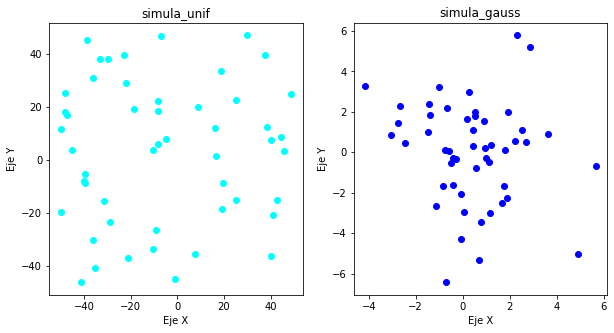

In [3]:
# Declaramos variables
N     = 50
dim   = 2
rango = [-50,50]
sigma = [5,7]

# Llamamos a las funciones para obtener los conjuntos de puntos
unif  = simula_unif(N,dim,rango)
gaus  = simula_gaus(N,dim,sigma) 

# Creamos el marco y los ejes, 
fig, ax = plt.subplots(1, 2, sharey = False,figsize=(10,5))


ax[0].scatter(x = unif[:,0], y=unif[:,1], color = 'aqua')
ax[0].set_title('simula_unif',loc='center')
ax[0].set_xlabel('Eje X')
ax[0].set_ylabel('Eje Y')

ax[1].scatter(x = gaus[:,0], y=gaus[:,1], color = 'blue')
ax[1].set_title('simula_gauss',loc='center')
ax[1].set_xlabel('Eje X')
ax[1].set_ylabel('Eje Y')



## Apartado 2)

a:  -0.6771584922002485
b:  -18.89022818933684


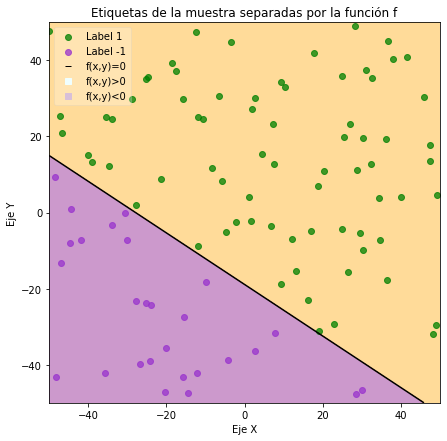

In [4]:
# Tomamos los 100 ejemplos bidimensionales dentro del rango especificado
muestra = simula_unif(100,2,[-50,50])
# Tomamos los parametros de la recta
a,b = simula_recta([-50,50])
print("a: ",a)
print("b: ",b)

# Etiquetamos
labels = etiquetar(muestra,f)
# visualizamos
plot_etiquetas(muestra,labels,f)

Siguiente apartado: Metemos reuido aleatorio en un 10% de la muestra y visualizamos

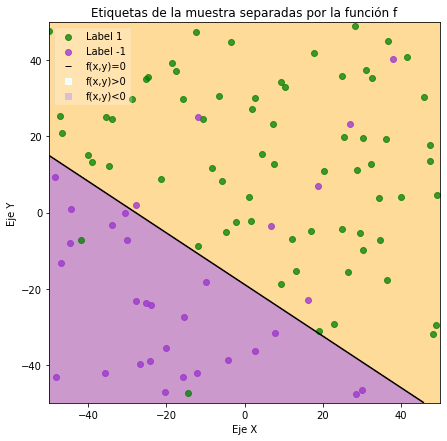

In [5]:
# Añadimos ruido
noise_labels = etiquetar(muestra,f,noise=True)
# visualizamos
plot_etiquetas(muestra,noise_labels,f)

Pasamos al Apartado c)

Función f(x,y) = (x-10)^2+(y-20)^2-400


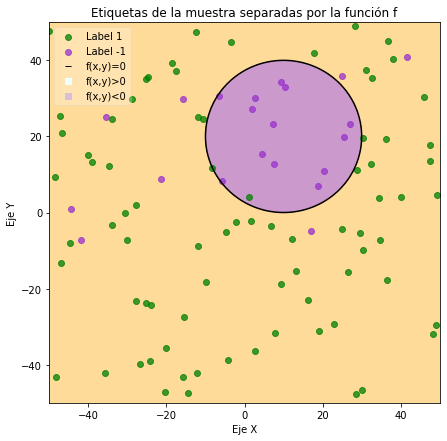

Función f(x,y) = 0.5(x+10)^2+(y-20)^2-400


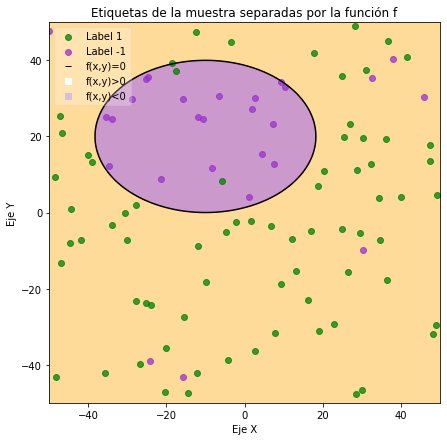

Función f(x,y) = 0.5(x-10)^2-(y+20)^2-400


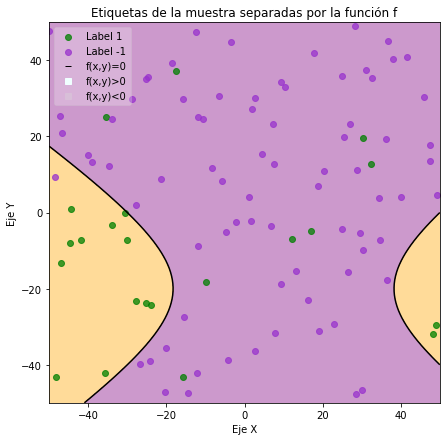

Función f(x,y) = y-20x^2-5x+3


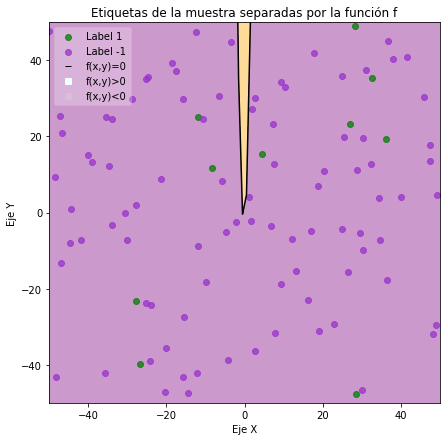

In [6]:
# Defino funciones 
def f1(x,y):
    return (x-10)**2+(y-20)**2-400
def f2(x,y):
    return 0.5*(x+10)**2+(y-20)**2-400
def f3(x,y):
    return 0.5*(x-10)**2-(y+20)**2-400
def f4(x,y):
    return y-20*x**2-5*x+3

vfun = [f1,f2,f3,f4]
vfun_str=['(x-10)^2+(y-20)^2-400','0.5(x+10)^2+(y-20)^2-400','0.5(x-10)^2-(y+20)^2-400','y-20x^2-5x+3']

for i, f in enumerate(vfun):
    # Etiquetamos
    labelf = etiquetar(muestra,f,noise=True)
    print(f'Función f(x,y) = {vfun_str[i]}')
    plot_etiquetas(muestra,labelf,f)

# Modelos Lineales

## Algoritmo Perceptron

In [7]:
def ajusta_PLA(datos,label,max_iter,vini):
    # Booleano que indica si ha habido algún cambio en el conjunto de datos
    cambio = True
    # Iteraciones
    it = 0
    # Vector con los pesos iniciales
    w = vini
    # Paramos cuando no haya cambio o alcancemos el límite de iteraciones
    while cambio and it<max_iter:
        cambio = False
        for i,x in enumerate(datos):
            if signo(np.dot(w,x))!=label[i]:
                w = w + x*label[i]
                cambio = True
        it+=1
        
    return w,it

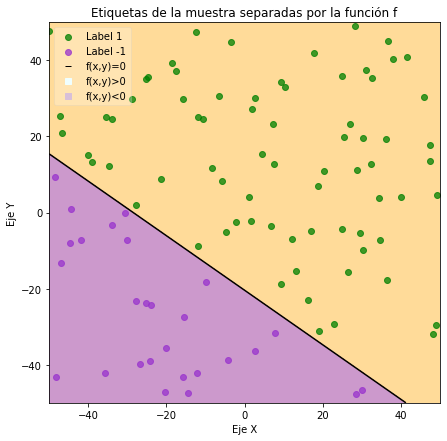

In [8]:
# Ajustamos el número máximo de iteraciones
max_iter = 10000

# Añadimos el elemento 1 a la característica
datos = np.array([[1,x1,x2] for x1,x2 in muestra])

# Creamos el vector con los pesos iniciales a cero
vini = np.zeros(datos[0].shape)

ws, it = ajusta_PLA(datos,labels,max_iter,vini)

plot_etiquetas(muestra,labels,lambda x,y: ws[0] + ws[1]*x + ws[2]*y)



In [9]:
labels

array([-1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1])